### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

### Assignment activity 3: Analyse customer sentiments with reviews

**Scenario**<br>
Leaders at Turtle Games understand that in order to maximise sales performance, they must offer products with which their customers are satisfied. Turtle Games’ e-commerce site features the ability for customers to leave reviews. If customers are dissatisfied with faulty or underperforming products, sales will be impacted. 

**Objective**<br>
Using the reviews collected from Turtle Games’ e-store, identify the customer sentiments based on their reviews for toys and games.

- What is the general sentiment of customers across all products?
- Based on the polarity of the sentiment, what are the **top 20 positive** and **top 20 negative reviews**?

### Prepare the workstation

In [1]:
# import libraries
import numpy as np
import pandas as pd

In [2]:
# import the data set
reviews_original = pd.read_csv('game_reviews.csv')

# view the DataFrame
reviews_original.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN
2,3,True,"09 12, 2016",A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400,NaN
3,5,True,"03 02, 2017",A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800,NaN
4,1,True,"02 08, 2017",A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000,NaN


In [3]:
# check the metadata
reviews_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         15000 non-null  int64 
 1   verified        15000 non-null  bool  
 2   reviewTime      15000 non-null  object
 3   reviewerID      15000 non-null  object
 4   reviewerName    15000 non-null  object
 5   reviewText      14990 non-null  object
 6   summary         14998 non-null  object
 7   unixReviewTime  15000 non-null  int64 
 8   image           160 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 952.3+ KB


In [4]:
# check the number of unique with the count to see if there are duplicated reviews
# there are duplicated reviewer IDs and reviewer names
reviews_original.describe(include='all')

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
count,15000.000000,15000,15000,15000,15000,14990,14998,1.500000e+04,160
unique,NaN,2,3048,14814,12469,14394,9117,NaN,160
top,NaN,True,"01 03, 2015",A3747YPXOBXRAT,Amazon Customer,Great game!,Five Stars,NaN,['https://images-na.ssl-images-amazon.com/imag...
freq,NaN,13176,41,5,984,28,2983,NaN,1
mean,4.574933,NaN,NaN,NaN,NaN,NaN,NaN,1.414857e+09,NaN
std,0.941795,NaN,NaN,NaN,NaN,NaN,NaN,7.449511e+07,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.391680e+08,NaN
25%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.379527e+09,NaN
50%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.421366e+09,NaN
75%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.467677e+09,NaN


In [5]:
# sort the duplicated reviews
duplicated = reviews_original[reviews_original.duplicated()]

duplicated

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
1145,5,True,"09 25, 2016",ABWSQI9992Q29,Gary P.,nice,Five Stars,1474761600,NaN
1155,5,True,"05 11, 2016",A115TZEJ3U3AER,bebo995,On-time and nice item.,Five Stars,1462924800,NaN
2584,4,True,"09 08, 2014",A2534XA4DU1H4Y,Amazon Customer,All Good,Four Stars,1410134400,NaN
10930,5,True,"07 12, 2014",ACNMHIMYEQX4Z,Joseph Vaughn,Beautifully written and bound. Full of the qui...,Five Stars,1405123200,NaN
12170,5,True,"01 18, 2015",A2D4OOJ0Y0T4J3,L. Scot Gowers,A+,Five Stars,1421539200,NaN
14402,5,True,"11 30, 2016",A3771WYFXR8ZQG,Peggy Perkins,Cute,Five Stars,1480464000,NaN
14417,5,True,"08 19, 2016",A2EVAEJU340BWV,Patricia,Gift for 5 yr old grandson,Five Stars,1471564800,NaN
14517,5,True,"01 17, 2015",AV2F45TXDRWJB,Stacy Hammel,Groovy,Groovy,1421452800,NaN


**Double checking the duplications of reviewText in Excel.**

- There are 14 duplicated reviews instead of 8. The duplicated rows are dropped through Excel.
- The 'image' column is also dropped.
- Save the cleaned data set as a new csv file and import again.

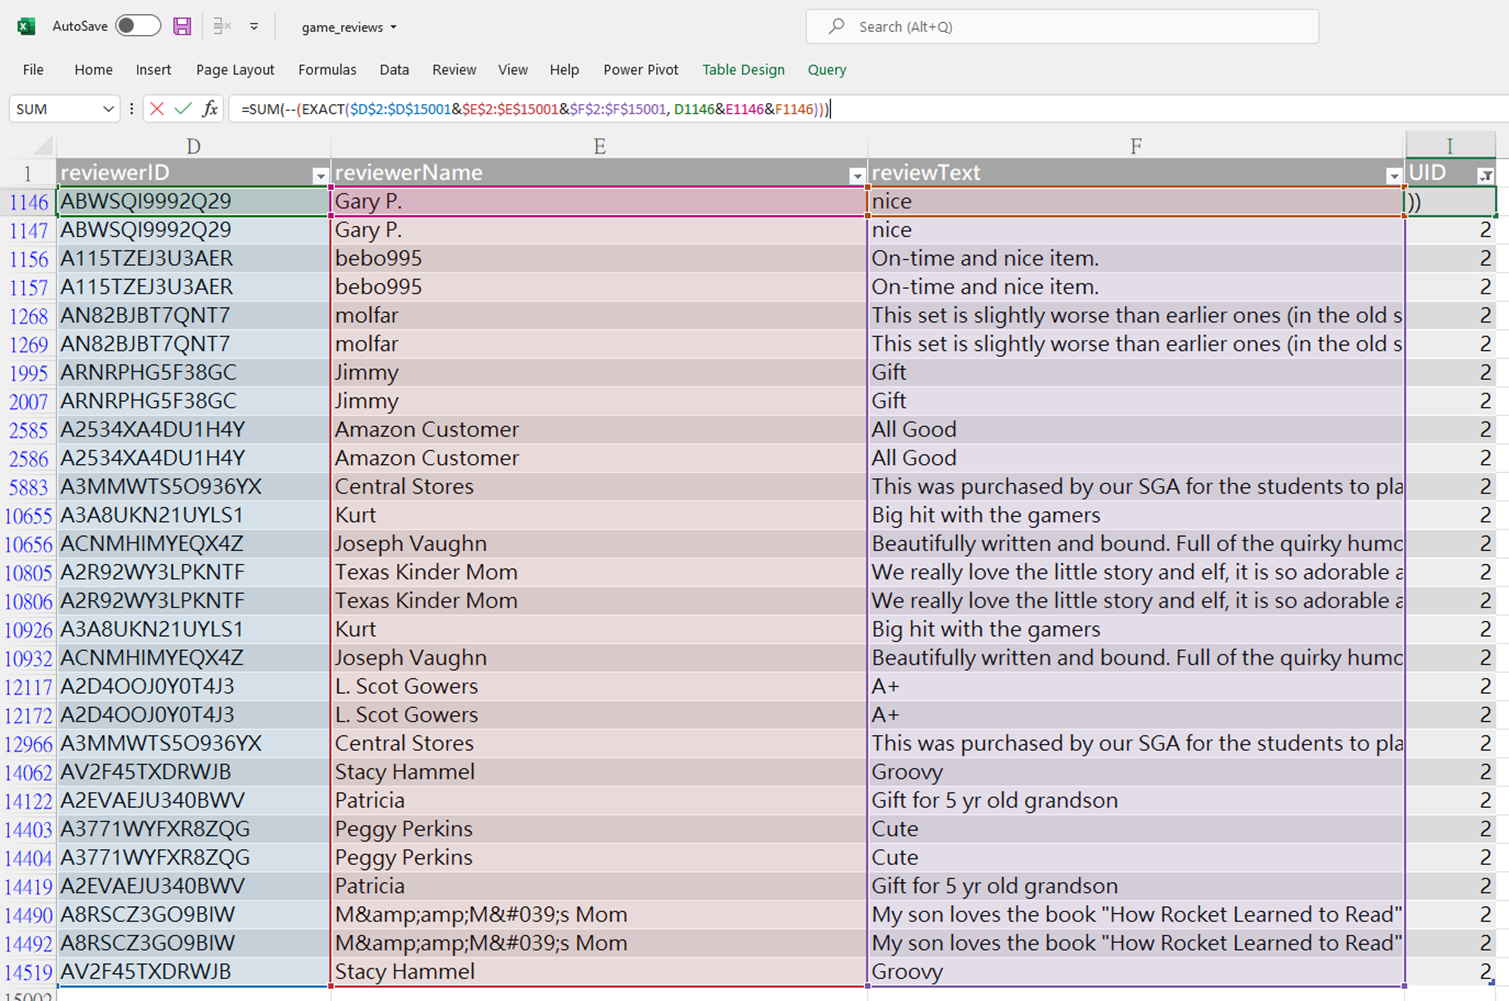

In [6]:
# import the new data set without the "image" column and no duplicated reviews
reviews = pd.read_csv('game_reviews_clean.csv')

# view the DataFrame
reviews.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime
0,2,False,2016/9/22,A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400
1,1,False,2016/9/18,A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800
2,3,True,2016/9/12,A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400
3,5,True,2017/3/2,A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800
4,1,True,2017/2/8,A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14986 entries, 0 to 14985
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         14986 non-null  int64 
 1   verified        14986 non-null  bool  
 2   reviewTime      14986 non-null  object
 3   reviewerID      14986 non-null  object
 4   reviewerName    14986 non-null  object
 5   reviewText      14976 non-null  object
 6   summary         14984 non-null  object
 7   unixReviewTime  14986 non-null  int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 834.3+ KB


In [8]:
# check the missing values
print(reviews.isnull().sum())

overall            0
verified           0
reviewTime         0
reviewerID         0
reviewerName       0
reviewText        10
summary            2
unixReviewTime     0
dtype: int64


In [9]:
# drop the rows with missing values 
# as they cannot provide any text to analyse in this case
reviews.dropna(inplace=True)

print(reviews.isnull().sum())

overall           0
verified          0
reviewTime        0
reviewerID        0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
dtype: int64


In [17]:
# check the distribution of ratings to get an overview
reviews['overall'].value_counts()

5    11556
4     1831
3      727
1      502
2      358
Name: overall, dtype: int64

Text(0.5, 0, 'Rating')

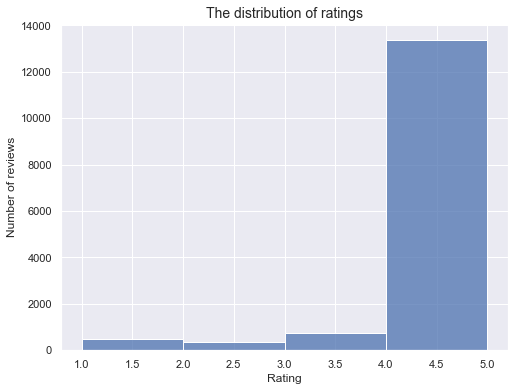

In [49]:
# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# set the size and theme of figure
sns.set_theme()
plt.subplots(figsize=(8,6))

# create the histogram for distribution of ages
ax = sns.histplot(data=reviews, x='overall', binwidth=1)

# reset the information of the graph
ax.set_title('The distribution of ratings', fontsize=14)
ax.set_ylabel('Number of reviews')
ax.set_xlabel('Rating')

In [21]:
# check the distribution of ratings to get an overview
reviews['overall'].describe()

count    14974.000000
mean         4.574796
std          0.941973
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

### Pre-processing textual data: Normalisation and noise removal

From 3.1.8, pre-processing includes:
- lowercase
- remove numbers or convert to textual representation
- remove punctuation
- strip white space
- remove general English stop words

In [22]:
# reset the index after dropping the missing values
reviews.reset_index(inplace=True)
reviews.head()

,index,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime
0,0,2,False,2016/9/22,A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400
1,1,1,False,2016/9/18,A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800
2,2,3,True,2016/9/12,A2EZ9PY1IHHBX0,unpreparedtodie,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",1473638400
3,3,5,True,2017/3/2,A139PXTTC2LGHZ,Ashley,Amazing buy! Bought it as a gift for our new d...,Five Stars,1488412800
4,4,1,True,2017/2/8,A3IB33V29XIL8O,Oghma_EM,As my review of GF9's previous screens these w...,Money trap,1486512000


In [23]:
# split the comments into single word: x.split()
# and change to lower case: x.lower()
# join them back into single line: " ".join
reviews['reviewText'] = reviews['reviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
reviews['reviewText'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: reviewText, dtype: object

In [24]:
# remove punctuation by str.replace
reviews['reviewText'] = reviews['reviewText'].str.replace('[\.\?\!\,\:\;\"\)\(\'\%\*]','')
reviews['reviewText'].head()

C:\Users\Miffy\AppData\Local\Temp/ipykernel_2688/2509413266.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews['reviewText'] = reviews['reviewText'].str.replace('[\.\?\!\,\:\;\"\)\(\'\%\*]','')


0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: reviewText, dtype: object

In [25]:
# import nltk and download nltk's resources to assist with tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Miffy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
# tokenize the words
reviews['tokens'] = reviews['reviewText'].apply(word_tokenize)
# preview the result
reviews['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [27]:
# combine all tokens into one list
all_tokens = []
for i in range(reviews.shape[0]):
    all_tokens = all_tokens + reviews['tokens'][i]

In [29]:
# filter out tokens that are neither alphabets or numbers (to eliminate punctuation marks etc)
tokens1 = [word for word in all_tokens if word.isalnum()]

In [30]:
tokens1

['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [31]:
# download the nltk resource, import the method, and extract stopwords in the English language
nltk.download ('stopwords')
from nltk.corpus import stopwords
english_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Miffy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [32]:
# create a list of tokens from the list of identified tokens after eliminating stopwords
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

In [33]:
# combine all tokens into one list
tokens2_string = ''
for value in tokens2:
    tokens2_string = tokens2_string + value + ' '

In [34]:
# import along with matplotlib and seaborn for visualisation
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(color_codes=True)

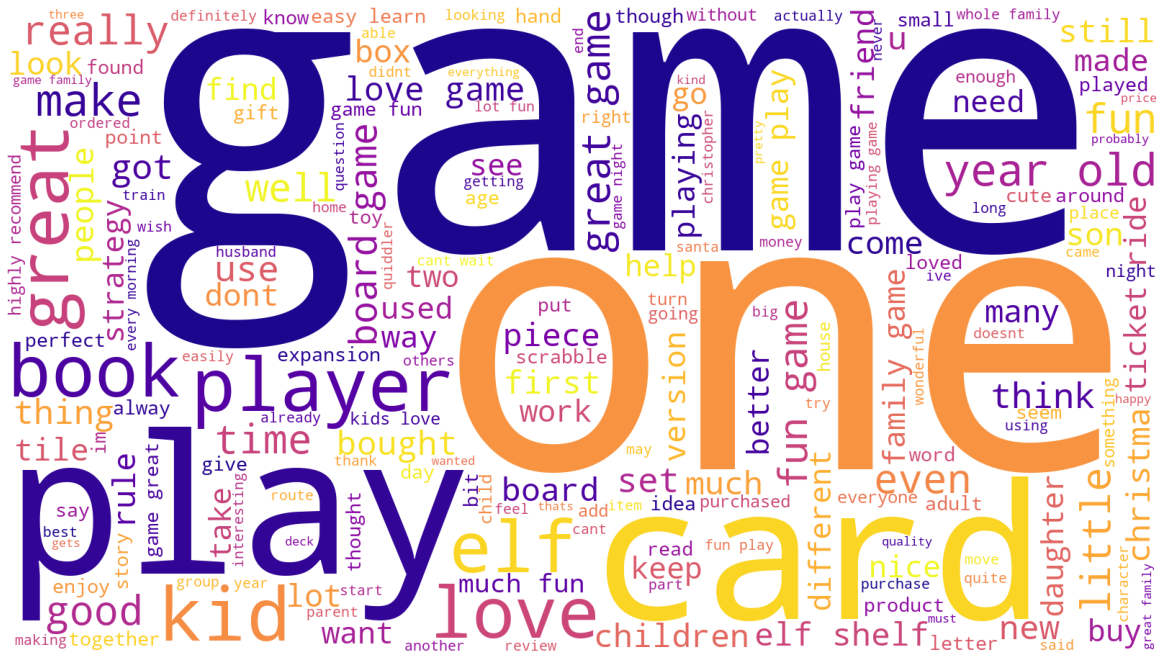

In [35]:
# set the wordcloud
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [36]:
# compute the tokens with the maximum frequency
from nltk.probability import FreqDist
fdist = FreqDist(tokens2)
fdist

FreqDist({'game': 12747, 'fun': 5370, 'great': 4333, 'play': 4156, 'elf': 3311, 'love': 3199, 'one': 2989, 'family': 2896, 'kids': 2527, 'like': 2285, ...})

In [37]:
# got the top 15 commonly used words across the comments
# import Counter
from collections import Counter

# generate a DataFrame out of Counter
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                    columns=['Word', 'Frequency']).set_index('Word')
counts

,Frequency
Word,
game,12747
fun,5370
great,4333
play,4156
elf,3311
love,3199
one,2989
family,2896
kids,2527


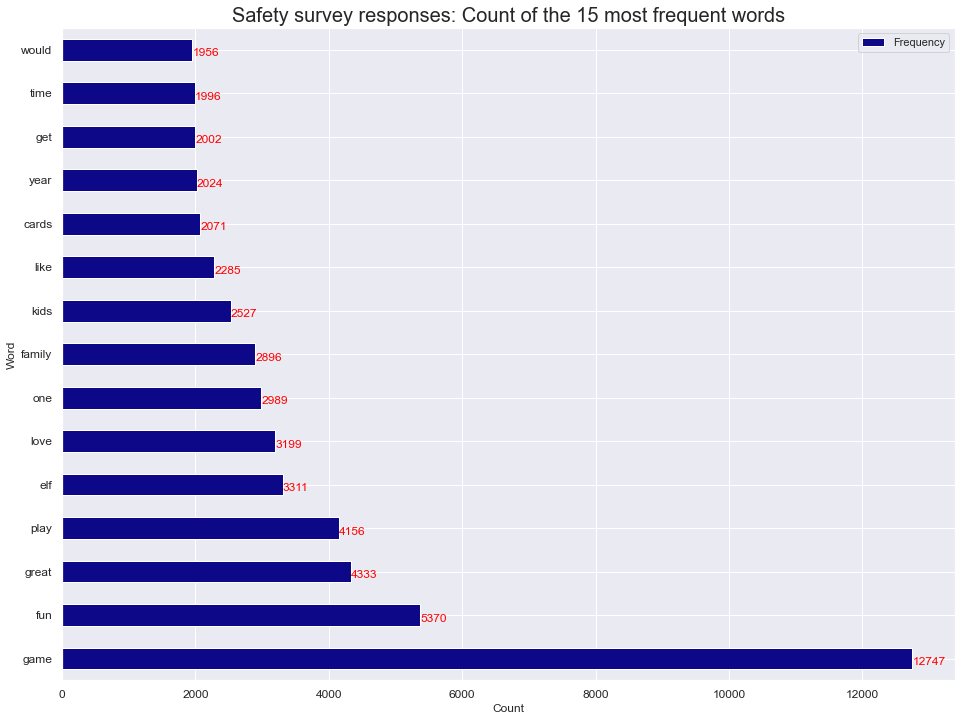

In [40]:
# generate a bar graph to show the frequencies of words
ax = counts.plot(kind='barh', figsize=(16, 12), fontsize=13, colormap ='plasma')
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Word", fontsize=12)
ax.set_title("Safety survey responses: Count of the 15 most frequent words", fontsize=20)

# add annotations
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize=12, color='red')

In [41]:
# import TextBlob of polarity analysis
from textblob import TextBlob

In [42]:
# define a function to extract a polarity score for the comment
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

# populate a new column with polarity scores for each comment
reviews['polarity'] = reviews['reviewText'].apply(generate_polarity)

# preview the result
reviews['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity, dtype: float64

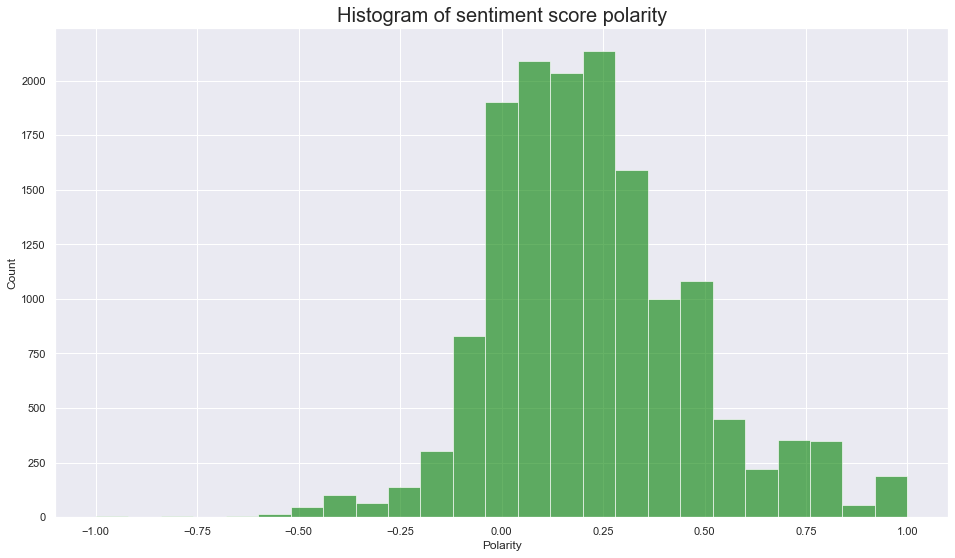

In [46]:
# Set the number of bins.
num_bins = 25

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(reviews['polarity'], num_bins, facecolor='green', alpha=0.6)
# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show();

In [47]:
# create a DataFrame.
positive_sentiment = reviews.nlargest(20, 'polarity')

# eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['overall', 'reviewTime', 'reviewText', 'polarity']]

# adjust the column width.
positive_sentiment.style.set_properties(subset=['reviewText'], **{'width': '500px'})

,overall,reviewTime,reviewText,polarity
7,5,2016/12/17,came in perfect condition,1.000000
165,5,2015/1/12,awesome book,1.000000
194,5,2017/3/4,awesome gift,1.000000
496,5,2015/6/7,excellent activity for teaching self-management skills,1.000000
524,5,2014/8/2,perfect just what i ordered,1.000000
591,5,2018/4/2,wonderful product,1.000000
609,5,2018/3/15,delightful product,1.000000
621,5,2017/4/27,wonderful for my grandson to learn the resurrection story,1.000000
790,5,2016/1/20,perfect,1.000000
933,5,2017/11/22,awesome,1.000000


In [48]:
# create a DataFrame.
positive_sentiment = reviews.nsmallest(20, 'polarity')

# eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['overall', 'reviewTime', 'reviewText', 'polarity']]

# adjust the column width.
positive_sentiment.style.set_properties(subset=['reviewText'], **{'width': '1200px'})

,overall,reviewTime,reviewText,polarity
208,1,2017/1/17,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
2039,1,2017/1/15,kids did not like it thought it was boring,-1.000000
3352,1,2016/6/2,some of the suggestions are disgusting,-1.000000
8306,1,2016/12/15,awful we did not receive what was advertised we paid $30 for the boxes set with book we got the elf in a bag without the book,-1.000000
7975,3,2017/12/18,was the elf on the shelf but it didnt have the dvd i was very disappointed,-0.975000
9497,1,2014/10/8,i havent even taken it out of the box yet but its already falling apart i contacted customer service and never even got a response i am very disappointed in this product,-0.975000
8745,1,2015/12/3,i hate the holidays bcuz of the elf he was disgusting i hate him with my life he doesnot leave the shelf alone,-0.866667
13161,4,2013/2/16,i do not under stand how you keep score or read the scoring i i do not like that at all i can never play score with anyone at all i hate that i cant play points,-0.800000
9130,2,2015/1/7,cliche and stupid i should not drink and amazon,-0.800000
9247,1,2014/12/27,just stupid,-0.800000
